# 00 Data preparation

Processing xlsx files from data folder into suitable inputs and generate other input files

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import pylab as plt
import statistics
import scipy.stats

In [2]:
data_dir = "DATA"
info_dir = data_dir
out_dir = "00_outputs_2020"

#os.makedirs(info_dir, exist_ok = True)
os.makedirs(out_dir, exist_ok = True)

## L1000 data

In [3]:
sig_info_df = pd.read_csv(os.path.join(data_dir, "siginfo_beta.txt"),sep='\t', index_col = 25)
sig_info_df = sig_info_df.loc[sig_info_df['cell_mfc_name'].str.contains('THP1')]

display(sig_info_df)

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


bead_batch  nearest_dose  \
sig_id                                                                 
KMS002_THP1_6H:BRD-K69885235-001-01-2:0             b5        0.0001   
KMS002_THP1_24H:BRD-K03073752-001-02-5:0.12         b5        0.1200   
KMS002_THP1_6H:BRD-K51556300-001-01-9:0.38          b5        0.3700   
KMS002_THP1_24H:BRD-K46625679-001-01-3:1.11         b5        1.1100   
KMS002_THP1_6H:J23                                  b5           NaN   
KMS002_THP1_6H:BRD-K58466974-001-01-9:0.01          b5        0.0100   
KMS002_THP1_24H:BRD-K12683773-300-02-1:0.01         b5        0.0100   
ZTO.XPR001_THP1_408H:CMAP-000:-666                 b17           NaN   
KMS002_THP1_6H:H24                                  b5           NaN   
KMS002_THP1_6H:D23                                  b5           NaN   
KMS002_THP1_24H:BRD-K46625679-001-01-3:0.12         b5        0.1200   
KMS002_THP1_24H:BRD-K95985487-001-02-1:0.12         b5        0.1200   
KMS002_THP1_6H:P21                                  b5           NaN   
KMS002_THP1_24H:P22                                 b5           NaN   
KMS002_THP1_6H:BRD-K38340366-001-12-4:0.04          b5        0.0400   
KMS002_THP1_6H:BRD-K95985487-001-02-1:0.12          b5        0.1200   
KMS002_THP1_6H:DMSO:-666                            b5           NaN   
KMS002_THP1_6H:P19                                  b5           NaN   
KMS002_THP1_24H:M23                                 b5           NaN   
KMS002_THP1_6H:BRD-K35669573-001-02-9:1.11          b5        1.1100   
KMS002_THP1_6H:BRD-K03073752-001-02-5:0.37          b5        0.3700   
KMS002_THP1_24H:BRD-K05922103-001-01-9:0.12         b5        0.1200   
KMS002_THP1_24H:BRD-K03073752-001-02-5:0.37         b5        0.3700   
KMS002_THP1_24H:BRD-K58466974-001-01-9:0.01         b5        0.0100   
KMS002_THP1_6H:P13                                  b5           NaN   
KMS002_THP1_24H:M15                                 b5           NaN   
KMS002_THP1_24H:BRD-K78930611-001-07-6:0.37         b5        0.3700   
KMS002_THP1_6H:BRD-K38340366-001-12-4:3.33          b5        3.3300   
KMS002_THP1_6H:G23                                  b5           NaN   
KMS002_THP1_6H:BRD-K35669573-001-02-9:0.01          b5        0.0100   
...                                                ...           ...   
AICHI001_THP1_4H:M21                               b39        0.6600   
AICHI001_THP1_24H:P10                              b32        0.1250   
AICHI001_THP1_24H:K06                              b32        0.0100   
AICHI002_THP1_24H:B12                              b33        0.0100   
AICHI002_THP1_24H:K21                              b33        0.6600   
AICHI002_THP1_24H:I19                              b33       10.0000   
AICHI002_THP1_24H:L23                              b33        0.0400   
AICHI002_THP1_24H:L03                              b33        0.6600   
AICHI002_THP1_24H:F11                              b33           NaN   
AICHI002_THP1_4H:E08                               b39           NaN   
AICHI002_THP1_4H:H05                               b39           NaN   
AICHI002_THP1_4H:I08                               b39           NaN   
AICHI002_THP1_4H:K04                               b39           NaN   
AICHI001_THP1_4H:E24                               b39        0.0100   
AICHI001_THP1_4H:O17                               b39        0.0400   
AICHI001_THP1_4H:L02                               b39        2.5000   
AICHI001_THP1_4H:F23                               b39        0.0400   
AICHI001_THP1_24H:C18                              b32        0.0100   
AICHI001_THP1_4H:J08                               b39        2.5000   
AICHI002_THP1_24H:F05                              b33        0.0400   
AICHI002_THP1_24H:L01                              b33       10.0000   
AICHI002_THP1_4H:G11                               b39           NaN   
AICHI002_THP1_4H:K20                               b39           NaN   
AICHI002_THP

In [4]:
sig_info_df = sig_info_df.drop(['AICHI002_THP1_4H:M10'])

In [5]:
LFC_df = pd.read_csv(os.path.join(data_dir, "level3_norm_thp1.csv"), index_col = 0)
display(LFC_df)

AARS     ABCB6     ABCC5     ABCF1  \
AICHI001_THP1_24H:A03              -0.051469  0.068087  1.619786  0.197440   
AICHI001_THP1_24H:A04               0.246263 -0.002630  0.004236  0.201474   
AICHI001_THP1_24H:A05               0.151863  0.053370 -0.194680  0.324075   
AICHI001_THP1_24H:A06               0.395531  0.381554 -0.213914  0.484775   
AICHI001_THP1_24H:A07              -1.160836  0.706071 -0.137480  0.157474   
AICHI001_THP1_24H:A08              -1.439902  0.792104  0.167069 -0.148192   
AICHI001_THP1_24H:A09              -1.096070  0.499521 -0.004130 -0.243926   
AICHI001_THP1_24H:A10              -0.561637  0.184971  0.223886  0.034957   
AICHI001_THP1_24H:A11              -0.232686  0.119670  0.004569 -0.047875   
AICHI001_THP1_24H:A12              -0.162419 -0.050846 -0.130914 -0.222360   
AICHI001_THP1_24H:A13              -1.274337  0.770754 -0.096747  0.009191   
AICHI001_THP1_24H:A14              -0.769469  0.416888  0.095819 -0.313926   
AICHI001_THP1_24H:A15              -0.696319  0.191138  0.034503 -0.241093   
AICHI001_THP1_24H:A16              -0.580170  0.099238 -0.144164 -0.509827   
AICHI001_THP1_24H:A17              -0.221636  0.178820  0.131569 -0.272925   
AICHI001_THP1_24H:A18               0.159714  0.196987  0.107419  0.198342   
AICHI001_THP1_24H:A19               0.844665 -0.012863  0.032636 -0.005626   
AICHI001_THP1_24H:A20               0.259364  0.031071 -0.065280  0.083558   
AICHI001_THP1_24H:A21               0.077464  0.124304  0.009753 -0.281827   
AICHI001_THP1_24H:A22              -0.011803  0.213837  0.062086 -0.203775   
AICHI001_THP1_24H:A23              -0.128386 -0.094229 -0.128964 -0.400826   
AICHI001_THP1_24H:A24               0.127247  0.084737  0.124753  0.054708   
AICHI001_THP1_24H:B03               0.016631  0.021220 -0.100364  0.049174   
AICHI001_THP1_24H:B04              -0.004270 -0.032696 -0.007314 -0.037392   
AICHI001_THP1_24H:B05              -0.027970  0.142205 -0.115947  0.038840   
AICHI001_THP1_24H:B06              -0.032169  0.085771 -0.120247  0.307040   
AICHI001_THP1_24H:B07               0.488796  0.132405  0.053786  0.172641   
AICHI001_THP1_24H:B08               0.125947  0.324870 -0.015647 -0.267775   
AICHI001_THP1_24H:B09               0.242831  0.102904 -0.175130 -0.041125   
AICHI001_THP1_24H:B10               0.199731  0.054337  0.040569 -0.313260   
...                                      ...       ...       ...       ...   
REP.B028_THP1_24H:O22               0.173555  0.153861  0.078300 -0.294425   
REP.B028_THP1_24H:O23               0.160855  0.148010 -0.324050 -0.486450   
REP.B028_THP1_24H:O24               0.137505  0.217261  0.270500 -0.142075   
REP.B028_THP1_24H:P01              -0.404195 -0.146789 -0.077175 -0.258100   
REP.B028_THP1_24H:P02              -0.173845 -0.332039 -0.435175  0.017975   
REP.B028_THP1_24H:P03              -0.175044 -0.010690 -0.086100 -0.039825   
REP.B028_THP1_24H:P04              -0.098645 -0.245164 -0.010850  0.176825   
REP.B028_THP1_24H:P05              -0.205594 -0.107390  0.082550  0.055724   
REP.B028_THP1_24H:P06              -0.056919 -0.254790 -0.348150  0.101500   
REP.B028_THP1_24H:P07              -0.134645  0.001635 -0.100000 -0.097750   
REP.B028_THP1_24H:P08              -0.383145  0.053460  0.009375 -0.186375   
REP.B028_THP1_24H:P09              -0.239095  0.096960  0.026350 -0.061675   
REP.B028_THP1_24H:P10              -0.298345 -0.216715 -0.037575  0.401624   
REP.B028_THP1_24H:P11              -0.303995 -0.261040  3.531150 -0.000325   
REP.B028_THP1_24H:P12              -0.143344 -0.008539 -0.167250  0.046375   
REP.B028_THP1_24H:P13              -0.045894 -0.057665 -0.159950  0.219075   
REP.B028_THP1_24H:P14              -0.320145  0.039410  0.014875 -0.206774   
REP.B028_THP1_24H:P15               0.096505 -0.104240  0.002375  0.003975   
REP.B028_THP1_24H:P16              -0.252844  0.085611  0.012800 -0.046075   
REP.B028_THP1_24H:P17              -0.079945  0.290560  0.0073

In [6]:
STVs = pd.read_excel(os.path.join(info_dir, "ALL_DATA.xlsx"), sheet_name = "STVs", index_col = 0)
STV_df = pd.DataFrame(np.zeros((len(LFC_df.columns),5)),index=LFC_df.columns,columns=STVs.columns)
STV_df.loc[STVs.index] = STVs

STV_df

norm_vec_resist  norm_vec_TB  norm_vec_load  norm_vec_damage  \
AARS            0.003751     0.000000       0.000000         0.000000   
ABCB6           0.005285     0.000000       0.000000         0.000000   
ABCC5          -0.000536     0.012496       0.014916         0.005246   
ABCF1          -0.004149     0.000000       0.009495        -0.006757   
ABCF3          -0.011733     0.000000       0.000000         0.000000   
ABHD4           0.006667     0.022855       0.000000         0.000000   
ABHD6           0.008941     0.026071       0.000000         0.000000   
ABL1           -0.011478     0.013836       0.000000         0.000000   
ACAA1          -0.023074     0.000000       0.000000         0.000000   
ACAT2          -0.015847     0.000000       0.001385         0.060261   
ACBD3           0.009268    -0.004322      -0.003073        -0.014488   
ACD            -0.001359     0.000000       0.000000         0.000000   
ACLY           -0.009190     0.000000       0.007292         0.008164   
ACOT9          -0.007997    -0.007395       0.000000         0.000000   
ADAM10          0.008642     0.000000       0.036450         0.049333   
ADAT1          -0.059104     0.000000      -0.001157        -0.005456   
ADGRE5         -0.039533     0.000000      -0.107090         0.010260   
ADGRG1         -0.010979    -0.021956      -0.004025        -0.001199   
ADH5           -0.013115     0.000000       0.002787        -0.002807   
ADI1            0.021319    -0.010390       0.013880         0.003338   
ADO             0.005481     0.000000       0.000000         0.000000   
ADRB2           0.018823    -0.037577       0.017812         0.056007   
AGL             0.009218     0.008263       0.043652         0.007208   
AKAP8           0.015433     0.000000      -0.038362        -0.015337   
AKAP8L          0.035756    -0.009026       0.000000         0.000000   
AKR7A2          0.019282     0.000000       0.000000         0.000000   
AKT1           -0.007904     0.017628       0.025588        -0.000979   
ALAS1           0.038989    -0.116899       0.070616        -0.017059   
ALDH7A1         0.018298     0.000000       0.000470         0.000000   
ALDOA          -0.016872     0.000000       0.000000         0.000000   
...                  ...          ...            ...              ...   
VGLL4          -0.019856     0.015346      -0.035572         0.000000   
VPS28          -0.018374     0.000000       0.000000         0.000000   
VPS72           0.026483     0.000000       0.000000         0.000000   
WASF3          -0.018214     0.000000       0.000000         0.000000   
WASHC4         -0.076851     0.000000       0.020505         0.037846   
WASHC5          0.019108     0.000000       0.000000         0.000000   
WDR61           0.039698     0.000000      -0.032237        -0.057587   
WDR7            0.024402     0.000000       0.030888        -0.005986   
WDTC1          -0.035426     0.000000       0.000000         0.000000   
WFS1            0.010187     0.000000       0.000000         0.000000   
WIPF2          -0.018797     0.000000       0.006581        -0.007001   
WRB            -0.010880     0.000000       0.000000         0.000000   
XBP1           -0.009086     0.000000      -0.008897        -0.000503   
XPNPEP1        -0.038446     0.008605      -0.034486        -0.027289   
XPO7            0.025472     0.000000       0.004299         0.011810   
YKT6           -0.013336     0.000000       0.011753        -0.009075   
YME1L1         -0.012950     0.000000      -0.006795        -0.028679   
YTHDF1          0.054677    -0.008221      -0.033869        -0.022369   
ZDHHC6          0.020495     0.000000      -0.034693         0.043889   
ZFP36          -0.009639     0.000000      -0.062427        -0.108473   
ZMIZ1          -0.004485     0.000000       0.000000         0.000000   
ZMYM2          -0.009450     0.000000       0.000000         0.000000   
ZNF131         -0.050069     0.000000       0.000000         0.0000

In [7]:
# create empty DPD data frame
DPD_df = pd.DataFrame(
    np.zeros((len(LFC_df.index), 5)),
    index=LFC_df.index,
    columns=["DPD_resist","DPD_TB","DPD_load","DPD_damage","DPD_microa"],
)

# populate
for exp_id in DPD_df.index:
    for i in range(len(STV_df.columns)):
        DPD_df.loc[exp_id].iloc[i] = np.dot(LFC_df.loc[exp_id], STV_df.iloc[:, i])

#DPD_df.to_csv(os.path.join(out_dir, "DPD_values.csv"))
display(DPD_df)

DPD_resist    DPD_TB  DPD_load  \
AICHI001_THP1_24H:A03                 0.261842  0.032259  0.566168   
AICHI001_THP1_24H:A04                 0.226468  0.198642  0.473818   
AICHI001_THP1_24H:A05                 0.251927  0.134967  0.525270   
AICHI001_THP1_24H:A06                 0.214162  0.738315 -0.009032   
AICHI001_THP1_24H:A07                 1.399810 -1.470066  0.908779   
AICHI001_THP1_24H:A08                 1.144082 -1.060767  1.067390   
AICHI001_THP1_24H:A09                 1.131856 -1.246598  0.641718   
AICHI001_THP1_24H:A10                 0.996826 -0.426615 -0.004641   
AICHI001_THP1_24H:A11                 0.575610 -0.061493 -0.120480   
AICHI001_THP1_24H:A12                 0.901070 -0.553890 -0.377571   
AICHI001_THP1_24H:A13                 1.388691 -1.273003  0.445184   
AICHI001_THP1_24H:A14                 0.920724 -0.660476 -0.155963   
AICHI001_THP1_24H:A15                 0.398561 -0.819989  0.577021   
AICHI001_THP1_24H:A16                 0.242110 -1.011022  0.194928   
AICHI001_THP1_24H:A17                 0.069766  0.022775 -0.071832   
AICHI001_THP1_24H:A18                -0.258707  0.012516 -0.149301   
AICHI001_THP1_24H:A19                -0.491092  0.075769  0.352010   
AICHI001_THP1_24H:A20                 0.298683  0.338285  0.084446   
AICHI001_THP1_24H:A21                 0.066521  0.100339 -0.227651   
AICHI001_THP1_24H:A22                -0.179522  0.227285 -0.060801   
AICHI001_THP1_24H:A23                 0.182003  0.149069  0.186550   
AICHI001_THP1_24H:A24                -0.099208 -0.344170  0.521046   
AICHI001_THP1_24H:B03                 0.132855  0.053906  0.049384   
AICHI001_THP1_24H:B04                 0.047861  0.033514  0.189104   
AICHI001_THP1_24H:B05                -0.033214 -0.024176  0.164772   
AICHI001_THP1_24H:B06                -0.118592 -0.459533 -0.242220   
AICHI001_THP1_24H:B07                -0.246576  0.156057 -0.259918   
AICHI001_THP1_24H:B08                -0.814853  0.256470 -0.130396   
AICHI001_THP1_24H:B09                -0.067588 -0.231715 -0.182379   
AICHI001_THP1_24H:B10                -0.380767 -0.085609  0.038826   
...                                        ...       ...       ...   
REP.B028_THP1_24H:O22                -0.089336 -0.245245 -0.583396   
REP.B028_THP1_24H:O23                -0.289725 -0.343452 -0.308781   
REP.B028_THP1_24H:O24                 0.212853  0.009847 -0.051145   
REP.B028_THP1_24H:P01                -0.192134 -0.538032 -0.697736   
REP.B028_THP1_24H:P02                 0.620735 -1.101580 -0.610836   
REP.B028_THP1_24H:P03                -0.411767  0.254898  0.161428   
REP.B028_THP1_24H:P04                -0.384845 -0.861872  0.419828   
REP.B028_THP1_24H:P05                -0.460181 -0.264814  0.193663   
REP.B028_THP1_24H:P06                 0.319830  0.151625  0.428586   
REP.B028_THP1_24H:P07                -0.393494 -0.468106  0.283671   
REP.B028_THP1_24H:P08                -0.489710 -0.175213  0.826065   
REP.B028_THP1_24H:P09                -0.483966 -0.478920  0.585236   
REP.B028_THP1_24H:P10                -0.718501 -0.374278  0.331455   
REP.B028_THP1_24H:P11                 0.006541 -0.388107 -0.048950   
REP.B028_THP1_24H:P12                -0.049493 -0.374169  0.394285   
REP.B028_THP1_24H:P13                -0.028963 -0.134112  0.196665   
REP.B028_THP1_24H:P14                -0.012649 -0.157005 -0.012900   
REP.B028_THP1_24H:P15                 0.313409 -0.597907 -0.833674   
REP.B028_THP1_24H:P16                -0.323214  0.055940 -0.585479   
REP.B028_THP1_24H:P17                -0.038883 -1.200631 -0.295175   
REP.B028_THP1_24H:P18                 0.377014 -0.998210 -0.215590   
REP.B028_THP1_24H:P19                -0.626608 -0.017345 -0.383202   
REP.B028_THP1_24H:P20                -0.283068 -1.284232 -0.290581   
REP.B028_THP1_24H:P21                -0.600961 -0.618642  0.251902   
REP.B028_THP1_24H:P22                -0.503356  0.027246  0.111793   
REP.B028_THP1_24H:P23                -0.983786

In [8]:
cpd_df = pd.read_csv(os.path.join(data_dir, "compoundinfo_beta.txt"),sep='\t', index_col = 0).fillna('')
cpd_df

cmap_name  target  \
pert_id                                         
BRD-A08715367              L-theanine           
BRD-A12237696            L-citrulline           
BRD-A18795974           BRD-A18795974           
BRD-A27924917           BRD-A27924917           
BRD-A35931254           BRD-A35931254           
BRD-A39230911            chlorphensin           
BRD-A77577770           BRD-A77577770           
BRD-A86415025           BRD-A86415025           
BRD-K05674516                PSI-7976           
BRD-K10673031  S-isopropylisothiourea           
BRD-K13994703           BRD-K13994703           
BRD-K17874705           BRD-K17874705           
BRD-K19203487                 SPP-301           
BRD-K25075681                SR-48692           
BRD-K25835157              PRT-062070           
BRD-K26341917         L-ergothioneine           
BRD-K27853494           BRD-K27853494           
BRD-K28308851           BRD-K28308851           
BRD-K29133151           BRD-K29133151           
BRD-K29968218                 KX-2391           
BRD-K33422401                    PMSF           
BRD-K36363294               I-BET-151           
BRD-K36381762           BRD-K36381762           
BRD-K42205652           BRD-K42205652           
BRD-K45437867           BRD-K45437867           
BRD-K49468759              KIN001-266           
BRD-K62277907               PYM-50028           
BRD-K66766661           BRD-K66766661           
BRD-K68552125           BRD-K68552125           
BRD-K70821460           BRD-K70821460           
...                               ...     ...   
BRD-K82823076              Ro-15-4513  GABRA5   
BRD-K96936751              bretazenil  GABRA1   
BRD-K96936751              bretazenil  GABRA2   
BRD-K96936751              bretazenil  GABRA3   
BRD-K96936751              bretazenil  GABRA5   
BRD-K32218650                MBX-2982  GPR119   
BRD-K66956375      oleoylethanolamide  GPR119   
BRD-K66956375      oleoylethanolamide   PPARA   
BRD-K31987754       oleylethanolamide  GPR119   
BRD-A18579359             wiskostatin    WASL   
BRD-A45107007              salubrinal  EIF2S1   
BRD-A77299732              salubrinal  EIF2S1   
BRD-K21295289               senicapoc   KCNN4   
BRD-K92213669              lomitapide    MTTP   
BRD-A66155091              trilostane    ESR1   
BRD-A66155091              trilostane    ESR2   
BRD-A66155091              trilostane  HSD3B2   
BRD-K61401890                deguelin    AKT1   
BRD-A61599461           BRD-A61599461    TSHR   
BRD-A81177136                   KN-62   P2RX7   
BRD-A81177136                   KN-62  CAMK2A   
BRD-K93480852                   KN-93  CAMK2A   
BRD-K55454768                 TAS-301  CAMK2A   
BRD-K08542803           gambogic-acid    BCL2   
BRD-K99504665       goserelin-acetate   GNRHR   
BRD-K62685538             triptorelin   GNRHR   
BRD-K62221994                 T-98475   GNRHR   
BRD-K53397409            benzoic-acid   RAB9A   
BRD-A62182663                 YK-4279    DHX9   
BRD-A62182663                 YK-4279    FLI1   

                                                             moa  \
pert_id                                                            
BRD-A08715367                                                      
BRD-A12237696                                                      
BRD-A18795974                                                      
BRD-A27924917                                                      
BRD-A35931254                                                      
BRD-A39230911                                                      
BRD-A77577770                                                      
BRD-A86415025                                                      
BRD-K05674516                                                      
BRD-K10673031                                                      
BRD-K13994703                                                      
BRD-K17874705                                           

In [15]:
target = 'MAPK14'

drugs = list(set(cpd_df.loc[cpd_df['target'].str.contains(target)]['cmap_name']))
targets =[]
doses=[]
for drug in drugs:
    targets.append(','.join(cpd_df.loc[cpd_df['cmap_name']==drug]['target']))
    doses.append(','.join(sorted(list(set(sig_info_df.loc[sig_info_df['cmap_name']==drug]['pert_idose'])))))
    
    
target_drugs_df = pd.DataFrame(list(zip(targets,doses)),index=drugs,columns=['targets','doses'])


display(target_drugs_df.loc[target_drugs_df['doses']!=''])

targets  \
losmapimod                                    MAPK14   
doramapimod                     MAPK14,MAPK11,MAPK12   
PH-797804                                     MAPK14   
SB-203580    MAPK14,MAPK1,MAPK11,MAPK14,MAPK1,MAPK11   
TAK-715                                       MAPK14   
SB-239063                MAPK14,MAPK11,MAPK14,MAPK11   
VX-745                                        MAPK14   

                                                         doses  
losmapimod      0.04 uM,0.125 uM,0.37 uM,1.11 uM,10 uM,3.33 uM  
doramapimod  0.01 uM,0.03 uM,0.04 uM,0.08 uM,0.12 uM,0.125 ...  
PH-797804    0.01 uM,0.03 uM,0.04 uM,0.08 uM,0.125 uM,0.25 ...  
SB-203580        0.04 uM,0.12 uM,0.37 uM,1.11 uM,10 uM,3.33 uM  
TAK-715      0.01 uM,0.03 uM,0.04 uM,0.08 uM,0.12 uM,0.125 ...  
SB-239063        0.04 uM,0.12 uM,0.37 uM,1.11 uM,10 uM,3.33 uM  
VX-745           0.04 uM,0.12 uM,0.37 uM,1.11 uM,10 uM,3.33 uM

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


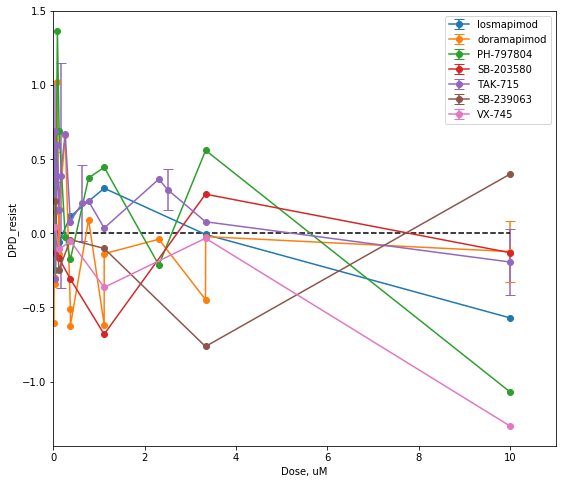

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


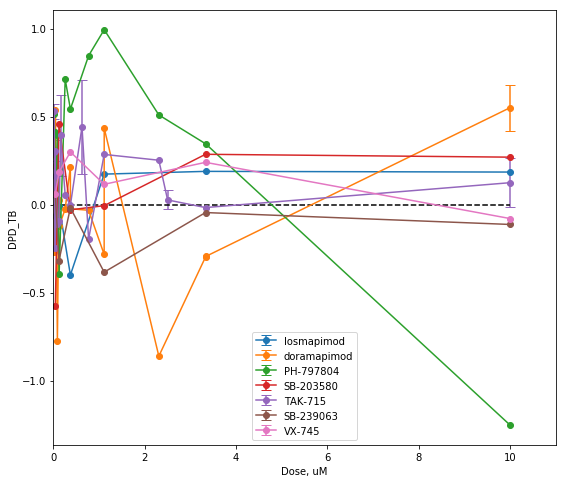

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


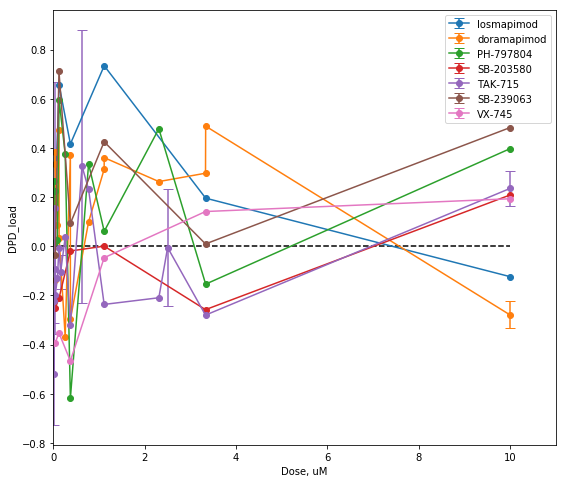

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


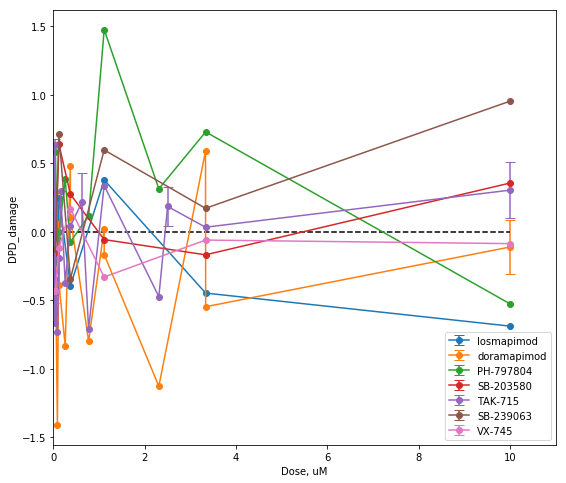

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


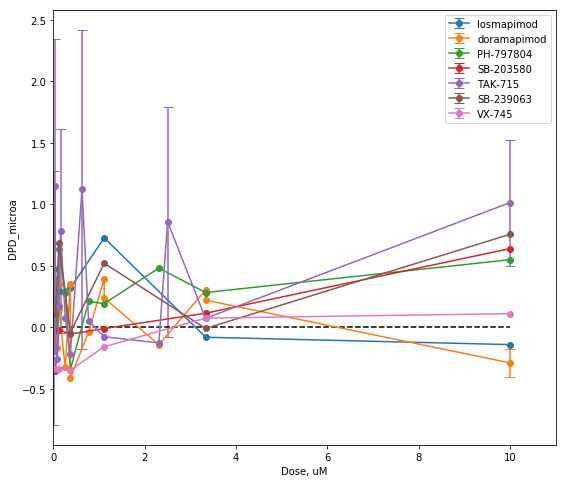

In [16]:

for DPD_val in ["DPD_resist","DPD_TB","DPD_load","DPD_damage","DPD_microa"]:
    plt.figure(figsize=(9,8))
    for drug in target_drugs_df.loc[target_drugs_df['doses']!=''].index:
        doses = sorted(list(set(sig_info_df.loc[sig_info_df['cmap_name']==drug]['pert_dose'])))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_df.loc[(sig_info_df['cmap_name']==drug) & (sig_info_df['pert_dose']==dose)].index
            #print(DPD_df.loc[labels,DPD_val])
            DPDs.append(statistics.mean(DPD_df.loc[labels,DPD_val]))
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels,DPD_val]))
        plt.errorbar(doses,DPDs,yerr=DPD_errs,fmt='o-',label=drug,capsize=5)
    plt.plot([0,10],[0,0],'--',color='black')
    plt.legend()
    plt.xlabel('Dose, uM')
    plt.ylabel(DPD_val)
    plt.xlim(0,11)
    plt.show()


/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


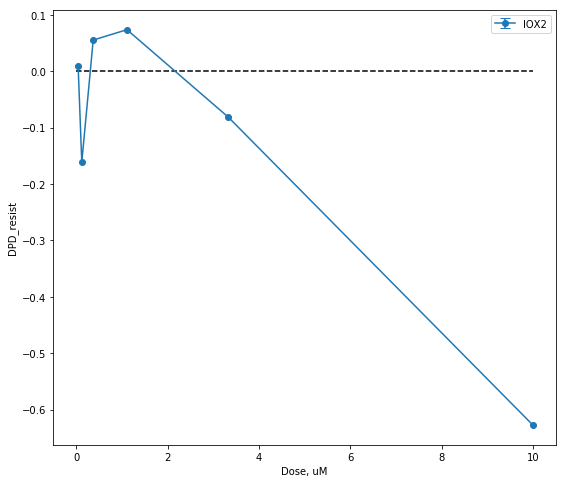

In [11]:
drugs = ['IOX2']

for DPD_val in ['DPD_resist']:
    plt.figure(figsize=(9,8))
    for drug in drugs:
        doses = sorted(list(set(sig_info_df.loc[sig_info_df['cmap_name']==drug]['pert_dose'])))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_df.loc[(sig_info_df['cmap_name']==drug) & (sig_info_df['pert_dose']==dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels,DPD_val]))
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels,DPD_val]))
        plt.errorbar(doses,DPDs,yerr=DPD_errs,fmt='o-',label=drug,capsize=5)
    plt.legend()
    plt.plot([0,10],[0,0],'--',color='black')
    plt.xlabel('Dose, uM')
    plt.ylabel(DPD_val)
    plt.show()


In [13]:
# delete highest dose of cediranib
print('\n'.join(drugs))

rebastinib
lenvatinib
orantinib
foretinib
cediranib
sunitinib


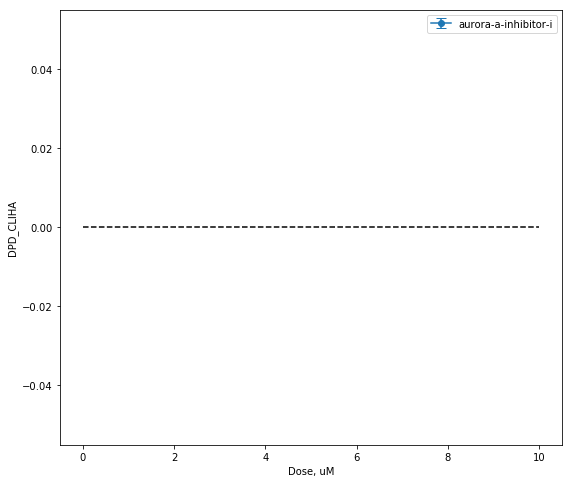

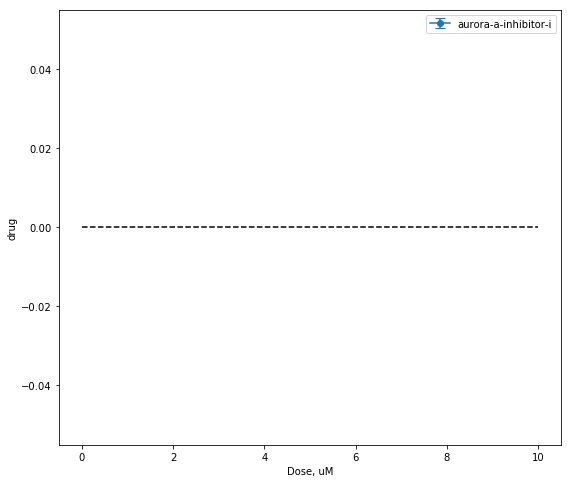

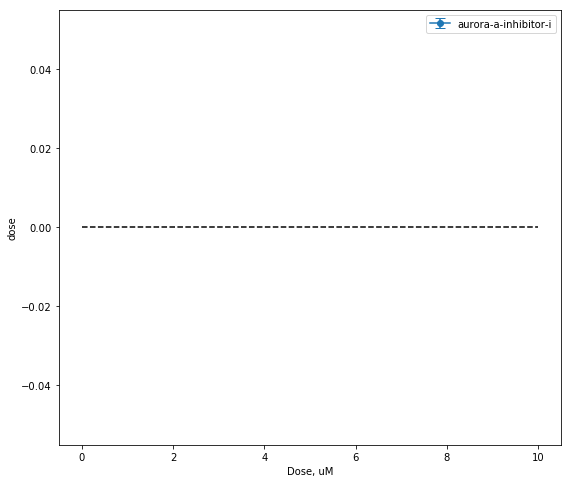

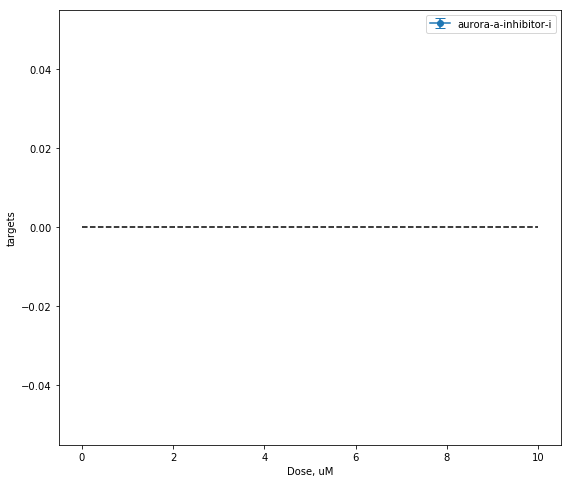

In [82]:
drugs = ['aurora-a-inhibitor-i']

for DPD_val in DPD_df.columns:
    plt.figure(figsize=(9,8))
    for drug in drugs:
        doses = sorted(list(set(sig_info_df.loc[sig_info_df['cmap_name']==drug]['pert_dose'])))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_df.loc[(sig_info_df['cmap_name']==drug) & (sig_info_df['pert_dose']==dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels,DPD_val]))
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels,DPD_val]))
        plt.errorbar(doses,DPDs,yerr=DPD_errs,fmt='o-',label=drug,capsize=5)
    plt.legend()
    plt.plot([0,10],[0,0],'--',color='black')
    plt.xlabel('Dose, uM')
    plt.ylabel(DPD_val)
    plt.show()


In [14]:
DPD_df['drug'] = ''
DPD_df['dose'] = ''
DPD_df['targets'] = ''

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id,'drug'] = sig_info_df.loc[exp_id,'cmap_name']
    DPD_df.loc[exp_id,'dose'] = sig_info_df.loc[exp_id,'pert_idose']
    DPD_df.loc[exp_id,'targets'] = ','.join(cpd_df.loc[cpd_df['cmap_name']==sig_info_df.loc[exp_id,'cmap_name']]['target'])

display(DPD_df)

DPD_resist   DPD_TNF    DPD_TB  DPD_load  \
AICHI001_THP1_24H:A03                -0.609521  0.512948  0.032259 -0.566168   
AICHI001_THP1_24H:A04                 0.005391  0.064746  0.198642 -0.473818   
AICHI001_THP1_24H:A05                -0.123600  0.317659  0.134967 -0.525270   
AICHI001_THP1_24H:A06                 0.186570 -1.032045  0.738315  0.009032   
AICHI001_THP1_24H:A07                 1.299415  1.144572 -1.470066 -0.908779   
AICHI001_THP1_24H:A08                 1.142104  0.804913 -1.060767 -1.067390   
AICHI001_THP1_24H:A09                 0.970807  0.982319 -1.246598 -0.641718   
AICHI001_THP1_24H:A10                 0.257003  0.317978 -0.426615  0.004641   
AICHI001_THP1_24H:A11                 0.136288  0.256493 -0.061493  0.120480   
AICHI001_THP1_24H:A12                 0.512999  0.125416 -0.553890  0.377571   
AICHI001_THP1_24H:A13                 1.566657  2.278219 -1.273003 -0.445184   
AICHI001_THP1_24H:A14                 0.456733  1.051005 -0.660476  0.155963   
AICHI001_THP1_24H:A15                 0.426155  0.293104 -0.819989 -0.577021   
AICHI001_THP1_24H:A16                -0.096634  0.222972 -1.011022 -0.194928   
AICHI001_THP1_24H:A17                 0.212752 -0.320298  0.022775  0.071832   
AICHI001_THP1_24H:A18                 0.019048 -0.073569  0.012516  0.149301   
AICHI001_THP1_24H:A19                 0.857644  0.542118  0.075769 -0.352010   
AICHI001_THP1_24H:A20                 0.510623 -0.098198  0.338285 -0.084446   
AICHI001_THP1_24H:A21                -0.091199 -0.224507  0.100339  0.227651   
AICHI001_THP1_24H:A22                -0.540081 -0.228749  0.227285  0.060801   
AICHI001_THP1_24H:A23                -0.179610  0.061824  0.149069 -0.186550   
AICHI001_THP1_24H:A24                -0.924042  0.112026 -0.344170 -0.521046   
AICHI001_THP1_24H:B03                -0.008277  0.467996  0.053906 -0.049384   
AICHI001_THP1_24H:B04                 0.063129  0.273584  0.033514 -0.189104   
AICHI001_THP1_24H:B05                 0.055228 -0.077008 -0.024176 -0.164772   
AICHI001_THP1_24H:B06                -0.385778  0.329359 -0.459533  0.242220   
AICHI001_THP1_24H:B07                 0.623568 -0.094276  0.156057  0.259918   
AICHI001_THP1_24H:B08                -0.252052 -0.586852  0.256470  0.130396   
AICHI001_THP1_24H:B09                 1.069431 -0.338175 -0.231715  0.182379   
AICHI001_THP1_24H:B10                 0.121037 -0.305314 -0.085609 -0.038826   
...                                        ...       ...       ...       ...   
REP.B028_THP1_24H:O22                -0.001809  0.817476 -0.245245  0.583396   
REP.B028_THP1_24H:O23                 0.172876 -0.465647 -0.343452  0.308781   
REP.B028_THP1_24H:O24                -0.509459 -0.318093  0.009847  0.051145   
REP.B028_THP1_24H:P01                -0.144183 -0.059342 -0.538032  0.697736   
REP.B028_THP1_24H:P02                -0.730339 -0.195235 -1.101580  0.610836   
REP.B028_THP1_24H:P03                -0.468842  0.025895  0.254898 -0.161428   
REP.B028_THP1_24H:P04                -0.936033  0.213049 -0.861872 -0.419828   
REP.B028_THP1_24H:P05                -0.926659  0.200039 -0.264814 -0.193663   
REP.B028_THP1_24H:P06                 0.054836 -0.540112  0.151625 -0.428586   
REP.B028_THP1_24H:P07                -0.171882  0.276312 -0.468106 -0.283671   
REP.B028_THP1_24H:P08                -0.194709 -1.111305 -0.175213 -0.826065   
REP.B028_THP1_24H:P09                -0.028153  0.354071 -0.478920 -0.585236   
REP.B028_THP1_24H:P10                 0.385484  0.387488 -0.374278 -0.331455   
REP.B028_THP1_24H:P11                 0.234439  1.469075 -0.388107  0.048950   
REP.B028_THP1_24H:P12                -0.273070  0.303841 -0.374169 -0.394285   
REP.B028_THP1_24H:P13                -0.160324  0.381272 -0.134112 -0.196665   
REP.B028_THP1_24H:P14                -0.153898  0.108111 -0.157005  0.012900   
REP.B028_THP1_24H:P15                -0.355278  1.439856 -0.597907  0.833674   
REP.B028_THP1_24H:P16               

In [15]:
DPD_df.sort_values(by='DPD_resist').to_csv(os.path.join(out_dir, "DPD_values.csv"))